In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk

import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
from tqdm import tqdm_notebook
import os
%matplotlib inline

In [2]:

import re
from gensim import corpora, models
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from nltk.stem.porter import *
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

# ML Libs...
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [32]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from keras.layers import Input, Embedding, LSTM, Dropout, BatchNormalization, Dense, concatenate, Flatten, Conv1D, MaxPool1D, LeakyReLU, ELU, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras import regularizers
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import tensorflow as tf
import matplotlib.pyplot as plt   
%matplotlib inline
import re
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pickle

In [ ]:
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
import joblib

import keras
import tensorflow as tf
from keras import optimizers, callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model
from keras.layers import Input, Dropout, Dense

#1.Loading **Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_data=pd.read_csv('/content/drive/My Drive/mercari/train.tsv',sep='\t')
test_data=pd.read_csv('/content/drive/My Drive/mercari/test.tsv',sep='\t')

In [5]:
print(train_data.shape)
print(test_data.shape)

(1482535, 8)
(693359, 7)


In [6]:
train_data=train_data[train_data['price']>0]

In [7]:
train_data["log_price"] = np.log(train_data["price"] + 1)
del train_data['price']

In [8]:
#https://stackoverflow.com/questions/14745022/how-to-split-a-column-into-two-columns
# train_data.loc[:,('sub_cat1','sub_cat2','sub_cat3','sub_cat4','sub_cat5')]= train_data['category_name'].str.split('/', 0, expand=True)
train_data[['sub_cat1','sub_cat2','sub_cat3','sub_cat4','sub_cat5']] = train_data['category_name'].str.split('/', 0, expand=True)
del train_data['category_name']
train_data.head(1)

,train_id,name,item_condition_id,brand_name,shipping,item_description,log_price,sub_cat1,sub_cat2,sub_cat3,sub_cat4,sub_cat5
0,0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,1,No description yet,2.397895,Men,Tops,T-shirts,None,None


In [9]:
test_data[['sub_cat1','sub_cat2','sub_cat3','sub_cat4','sub_cat5']] = test_data['category_name'].str.split('/', 0, expand=True)
del test_data['category_name']
test_data.head(1)

,test_id,name,item_condition_id,brand_name,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,sub_cat4,sub_cat5
0,0,"Breast cancer ""I fight like a girl"" ring",1,NaN,1,Size 7,Women,Jewelry,Rings,None,None


In [10]:
# https://stackoverflow.com/questions/28538536/deleting-multiple-columns-based-on-column-names-in-pandas
train_data.drop(['sub_cat4', 'sub_cat5'], axis=1, inplace=True)
test_data.drop(['sub_cat4', 'sub_cat5'], axis=1, inplace=True)

In [11]:
print(train_data.columns)
print(test_data.columns)

Index(['train_id', 'name', 'item_condition_id', 'brand_name', 'shipping',
       'item_description', 'log_price', 'sub_cat1', 'sub_cat2', 'sub_cat3'],
      dtype='object')
Index(['test_id', 'name', 'item_condition_id', 'brand_name', 'shipping',
       'item_description', 'sub_cat1', 'sub_cat2', 'sub_cat3'],
      dtype='object')


In [12]:
train_data['item_description']=train_data['item_description'].fillna('none')
train_data['brand_name']=train_data['brand_name'].fillna('unknown')
train_data['sub_cat1']=train_data['sub_cat1'].fillna('none')
train_data['sub_cat2']=train_data['sub_cat2'].fillna('none')
train_data['sub_cat3']=train_data['sub_cat3'].fillna('none')

test_data['item_description']=test_data['item_description'].fillna('none')
test_data['brand_name']=test_data['brand_name'].fillna('unknown')
test_data['sub_cat1']=test_data['sub_cat1'].fillna('none')
test_data['sub_cat2']=test_data['sub_cat2'].fillna('none')
test_data['sub_cat3']=test_data['sub_cat3'].fillna('none')

In [13]:
train_data.isnull().sum()

train_id             0
name                 0
item_condition_id    0
brand_name           0
shipping             0
item_description     0
log_price            0
sub_cat1             0
sub_cat2             0
sub_cat3             0
dtype: int64

In [14]:
test_data.isnull().sum()

test_id              0
name                 0
item_condition_id    0
brand_name           0
shipping             0
item_description     0
sub_cat1             0
sub_cat2             0
sub_cat3             0
dtype: int64

In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('all') 
stopwords=set(stopwords.words('english'))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [16]:
def counting_stopwords(data):
    count_words=[]
    for i in tqdm(data['item_description']):
        count=0
        for j in i.split(' '):
            if j in stopwords:
                count+=1
        count_words.append(count)
    return count_words
train_data['count_of_stopwords']=counting_stopwords(train_data)
test_data['count_of_stopwords']=counting_stopwords(test_data)

100%|██████████| 693359/693359 [00:02<00:00, 251076.42it/s]


In [17]:

# ref - www.appliedaicourse.com/
''' This code performs text processing by cleaning text including 
removing stopwords, reemoving special characters, performing, word decontraction etc. '''

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

def text_preprocess(data):
    preprocessed = []
    # tqdm is for printing the status bar
    for sentance in tqdm_notebook(data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e not in stopwords)
        preprocessed.append(sent.lower().strip())
    return preprocessed

In [18]:
train_data['preprocessed_item_des'] = text_preprocess(train_data['item_description'])
test_data['preprocessed_item_des'] = text_preprocess(test_data['item_description'])

In [19]:
train_data['length']=train_data['preprocessed_item_des'].str.len()
test_data['length']=test_data['preprocessed_item_des'].str.len()

In [20]:
def brand_name_category(data):
    cat_brandname=[]
    for i in data['brand_name']:
        if i!='unknown':
            cat_brandname.append(1)
        else:
            cat_brandname.append(0)
    return cat_brandname
    
train_data['brand_name_present']=brand_name_category(train_data)
test_data['brand_name_present']=brand_name_category(test_data)

In [21]:
#we have done stopword removal on item description and obtained new column so now we are remvoing item description and keeping other column
del train_data['item_description']
del test_data['item_description']

splitting the data into train data and cv data

In [26]:
#train_test_split
y=train_data['log_price']

In [27]:
X=train_data.drop(['log_price'], axis=1)

In [29]:
# splitting train internally into train and cv
X_train, X_cv, y_train, y_cv = train_test_split(X,y, test_size=0.05)

In [30]:
print(X_train.shape , y_train.shape)
print(X_cv.shape    , y_cv.shape)

(1407577, 12) (1407577,)
(74084, 12) (74084,)


In [33]:
#item description
max_length=250
max_vocab_size=1000000


In [34]:
t = Tokenizer(num_words=max_vocab_size)
t.fit_on_texts(X_train['name'].tolist())
encoded_docs_X_train_name = t.texts_to_sequences(X_train["name"])
encoded_docs_X_cv_name=t.texts_to_sequences(X_cv['name'])
encoded_docs_X_test_name=t.texts_to_sequences(test_data['name'])

In [35]:
padded_docs_X_train_name = pad_sequences(encoded_docs_X_train_name, maxlen=max_length, padding='post')
padded_docs_X_cv_name= pad_sequences(encoded_docs_X_cv_name, maxlen=max_length,padding='post')
padded_docs_X_test_name= pad_sequences(encoded_docs_X_test_name, maxlen=max_length,padding='post')

print(padded_docs_X_train_name.shape)

(1407577, 250)


In [39]:
vocab_size = len(t.word_index) + 1
print(vocab_size)

115375


In [40]:
embeddings_index = dict()
with open('/content/drive/MyDrive/mercari/wiki-news-300d-1M.vec') as f:
    for line in f:
        w_coef = line.rstrip().rsplit(' ')
        word = w_coef[0]
        coefs = np.asarray(w_coef[1:], dtype='float32')
        embeddings_index[word]=coefs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [41]:
print(embedding_matrix.shape)

(115375, 300)


In [42]:
input_layer_name=Input(shape=(max_length,), name='input_layer_name')
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable=False)(input_layer_name)
x1 = SpatialDropout1D(0.3)(embedding_layer)
lstm=LSTM(128)(x1)

In [43]:
flatten_1=Flatten()(lstm)

In [44]:
le = LabelEncoder()
le.fit(X_train['sub_cat1'])
X_train_sub_cat1 = le.transform(X_train["sub_cat1"])
X_cv_sub_cat1 = le.transform(X_cv["sub_cat1"])
X_test_sub_cat1 = le.transform(test_data["sub_cat1"])

In [45]:
input_1= Input(shape=(1,), name= 'sub_cat1')
vocab_size_1= X_train['sub_cat1'].nunique()
print(vocab_size_1)
embedding_layer_1 = Embedding(input_dim=vocab_size_1+1 ,output_dim=min(vocab_size_1//2,50),input_length=1)(input_1)
flatten_2=Flatten()(embedding_layer_1)

11


In [46]:
le = LabelEncoder()
le.fit(X_train['sub_cat2'])
X_train_sub_cat2 = le.transform(X_train["sub_cat2"])
X_cv_sub_cat2 = le.transform(X_cv["sub_cat2"])
X_test_sub_cat2 = le.transform(test_data["sub_cat2"])

In [47]:
input_2 = Input(shape=(1,), name= 'sub_cat2')
vocab_size_1= X_train['sub_cat2'].nunique()
embedding_layer_2 = Embedding(input_dim=vocab_size_1+1 ,output_dim=min(vocab_size_1//2,50),input_length=1)(input_2)
flatten_3=Flatten()(embedding_layer_2)


In [48]:
le = LabelEncoder()
le.fit(X_train['sub_cat3'])

X_cv["sub_cat3"] = X_cv["sub_cat3"].map(lambda s: '<unknown>' if s not in le.classes_ else s)
le.classes_ = np.append(le.classes_, '<unknown>')
test_data["sub_cat3"] = test_data["sub_cat3"].map(lambda s: '<unknown>' if s not in le.classes_ else s)

X_train_sub_cat3 = le.transform(X_train["sub_cat3"])
X_cv_sub_cat3 = le.transform(X_cv["sub_cat3"])
X_test_sub_cat3 = le.transform(test_data["sub_cat3"])

In [49]:
input_3 = Input(shape=(1,), name= 'sub_cat3')
vocab_size_1= X_train['sub_cat3'].nunique()
embedding_layer_3 = Embedding(input_dim=vocab_size_1+1 ,output_dim=min(vocab_size_1//2,50),input_length=1)(input_3)
flatten_4=Flatten()(embedding_layer_3)


In [50]:
le = LabelEncoder()
le.fit(X_train['brand_name'])

X_cv["brand_name"] = X_cv["brand_name"].map(lambda s: '<unknown>' if s not in le.classes_ else s)
le.classes_ = np.append(le.classes_, '<unknown>')
test_data["brand_name"] = test_data["brand_name"].map(lambda s: '<unknown>' if s not in le.classes_ else s)

X_train_brand_name = le.transform(X_train["brand_name"])
X_cv_brand_name = le.transform(X_cv["brand_name"])
X_test_brand_name = le.transform(test_data["brand_name"])

In [51]:
input_4 = Input(shape=(1,), name= 'brand_name')
vocab_size_1= X_train['brand_name'].nunique()
print(vocab_size_1)
embedding_layer_4 = Embedding(input_dim=vocab_size_1+1 ,output_dim=min(vocab_size_1//2,50),input_length=1)(input_4)
flatten_5=Flatten()(embedding_layer_4)


4752


In [52]:
t1 = Tokenizer(num_words= 1000000 )
t1.fit_on_texts(X_train['preprocessed_item_des'].tolist())
encoded_docs_X_train_pre_item_des = t1.texts_to_sequences(X_train["preprocessed_item_des"])
encoded_docs_X_cv_pre_item_des=t1.texts_to_sequences(X_cv['preprocessed_item_des'])
encoded_docs_X_test_pre_item_des=t1.texts_to_sequences(test_data['preprocessed_item_des'])


In [53]:
padded_docs_X_train_pre_item_des = pad_sequences(encoded_docs_X_train_pre_item_des, maxlen=max_length, padding='post')
padded_docs_X_cv_pre_item_des= pad_sequences(encoded_docs_X_cv_pre_item_des, maxlen=max_length,padding='post')

padded_docs_X_test_pre_item_des= pad_sequences(encoded_docs_X_test_pre_item_des, maxlen=max_length,padding='post')

print(padded_docs_X_train_pre_item_des.shape)

(1407577, 250)


In [54]:
vocab_size=len(t1.word_index)+1
vocab_size

156311

In [55]:
embeddings_index = dict()
with open('/content/drive/MyDrive/mercari/wiki-news-300d-1M.vec') as f:
    for line in f:
        w_coef = line.rstrip().rsplit(' ')
        word = w_coef[0]
        coefs = np.asarray(w_coef[1:], dtype='float32')
        embeddings_index[word]=coefs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t1.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [57]:
input_layer_pre_item_des=Input(shape=(max_length,), name='input_layer_item_des_pre')
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable=False)(input_layer_pre_item_des)
lstm=LSTM(128)(embedding_layer)
flatten_1_2=Flatten()(lstm)

In [58]:
scaler=StandardScaler()
scaler.fit(np.array(X_train['length']).reshape(-1,1))
X_train_len=scaler.transform(np.array(X_train['length']).reshape(-1,1))
X_cv_len=scaler.transform(np.array(X_cv['length']).reshape(-1,1))
test_data_len=scaler.transform(np.array(test_data['length']).reshape(-1,1))
print(X_train_len.shape) 
print(X_cv_len.shape) 
print(test_data_len.shape)

(1407577, 1)
(74084, 1)
(693359, 1)


In [59]:
scaler=StandardScaler()
scaler.fit(np.array(X_train['count_of_stopwords']).reshape(-1,1))
X_train_stop_count=scaler.transform(np.array(X_train['count_of_stopwords']).reshape(-1,1))
X_cv_stop_count=scaler.transform(np.array(X_cv['count_of_stopwords']).reshape(-1,1))
test_data_stop_count=scaler.transform(np.array(test_data['count_of_stopwords']).reshape(-1,1))
print(X_train_stop_count.shape) 
print(X_cv_stop_count.shape) 
print(test_data_stop_count.shape)

(1407577, 1)
(74084, 1)
(693359, 1)


In [60]:
scaler=StandardScaler()
scaler.fit(np.array(X_train['item_condition_id']).reshape(-1,1))
X_train_item_condition_id=scaler.transform(np.array(X_train['item_condition_id']).reshape(-1,1))
X_cv_item_condition_id=scaler.transform(np.array(X_cv['item_condition_id']).reshape(-1,1))
test_data_item_condition_id=scaler.transform(np.array(test_data['item_condition_id']).reshape(-1,1))
print(X_train_item_condition_id.shape) 
print(X_cv_item_condition_id.shape) 
print(test_data_item_condition_id.shape)

(1407577, 1)
(74084, 1)
(693359, 1)


In [61]:
scaler=StandardScaler()
scaler.fit(np.array(X_train['shipping']).reshape(-1,1))
X_train_shipping=scaler.transform(np.array(X_train['shipping']).reshape(-1,1))
X_cv_shipping=scaler.transform(np.array(X_cv['shipping']).reshape(-1,1))
test_data_shipping=scaler.transform(np.array(test_data['shipping']).reshape(-1,1))
print(X_train_shipping.shape) 
print(X_cv_shipping.shape) 
print(test_data_shipping.shape)

(1407577, 1)
(74084, 1)
(693359, 1)


In [62]:
scaler=StandardScaler()
scaler.fit(np.array(X_train['brand_name_present']).reshape(-1,1))
X_train_brand_name_present=scaler.transform(np.array(X_train['brand_name_present']).reshape(-1,1))
X_cv_brand_name_present=scaler.transform(np.array(X_cv['brand_name_present']).reshape(-1,1))
test_data_brand_name_present=scaler.transform(np.array(test_data['brand_name_present']).reshape(-1,1))
print(X_train_brand_name_present.shape) 
print(X_cv_brand_name_present.shape) 
print(test_data_shipping.shape)

(1407577, 1)
(74084, 1)
(693359, 1)


In [63]:
X_train_numerical_feat = np.concatenate((X_train_len,X_train_stop_count,X_train_item_condition_id,X_train_shipping,X_train_brand_name_present), axis = 1)
X_cv_numerical_feat= np.concatenate((X_cv_len,X_cv_stop_count,X_cv_item_condition_id,X_cv_shipping,X_cv_brand_name_present), axis = 1)


X_test_numerical_feat= np.concatenate((test_data_len,test_data_stop_count,test_data_item_condition_id,test_data_shipping,test_data_brand_name_present), axis = 1)
print(X_train_numerical_feat.shape,X_cv_numerical_feat.shape,X_test_numerical_feat.shape)

(1407577, 5) (74084, 5) (693359, 5)


In [64]:
numerical_input= Input(shape=(5,), name='numerical_input')
dense_numerical = Dense(16,activation="relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(numerical_input)

In [65]:
concat_layer = concatenate(inputs=[flatten_1_2,flatten_1,flatten_2, flatten_3, flatten_4, flatten_5, dense_numerical], name='concat')

# adding the dense layers and dropout layers as per given diagram
x = Dense(units=100, activation='relu', kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001), name='layer1')(concat_layer)
x = Dropout(0.4)(x)
x=BatchNormalization()(x)
x = Dense(units=50, activation='relu', kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001), name='layer2')(x)
x = Dropout(0.3)(x)
x=BatchNormalization()(x)

x = Dense(units=10, activation='relu', kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001), name='layer3')(x) #0.001
# output = Dense(units=2, activation='softmax', kernel_initializer='he_normal', name='output')(x)
output = Dense(1, activation='linear')(x)
model= Model(inputs=[input_layer_pre_item_des,input_layer_name,input_1,input_2,input_3,input_4,numerical_input], outputs=output)

In [66]:
# https://www.kaggle.com/marknagelberg/rmsle-function
import math
def rmsle(y, y_pred):
	assert len(y) == len(y_pred)
	terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
	return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [68]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer_name (InputLayer)   [(None, 250)]        0                                            
__________________________________________________________________________________________________
input_layer_item_des_pre (Input [(None, 250)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 250, 300)     34612500    input_layer_name[0][0]           
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 250, 300)     46893300    input_layer_item_des_pre[0][0]   
______________________________________________________________________________________________

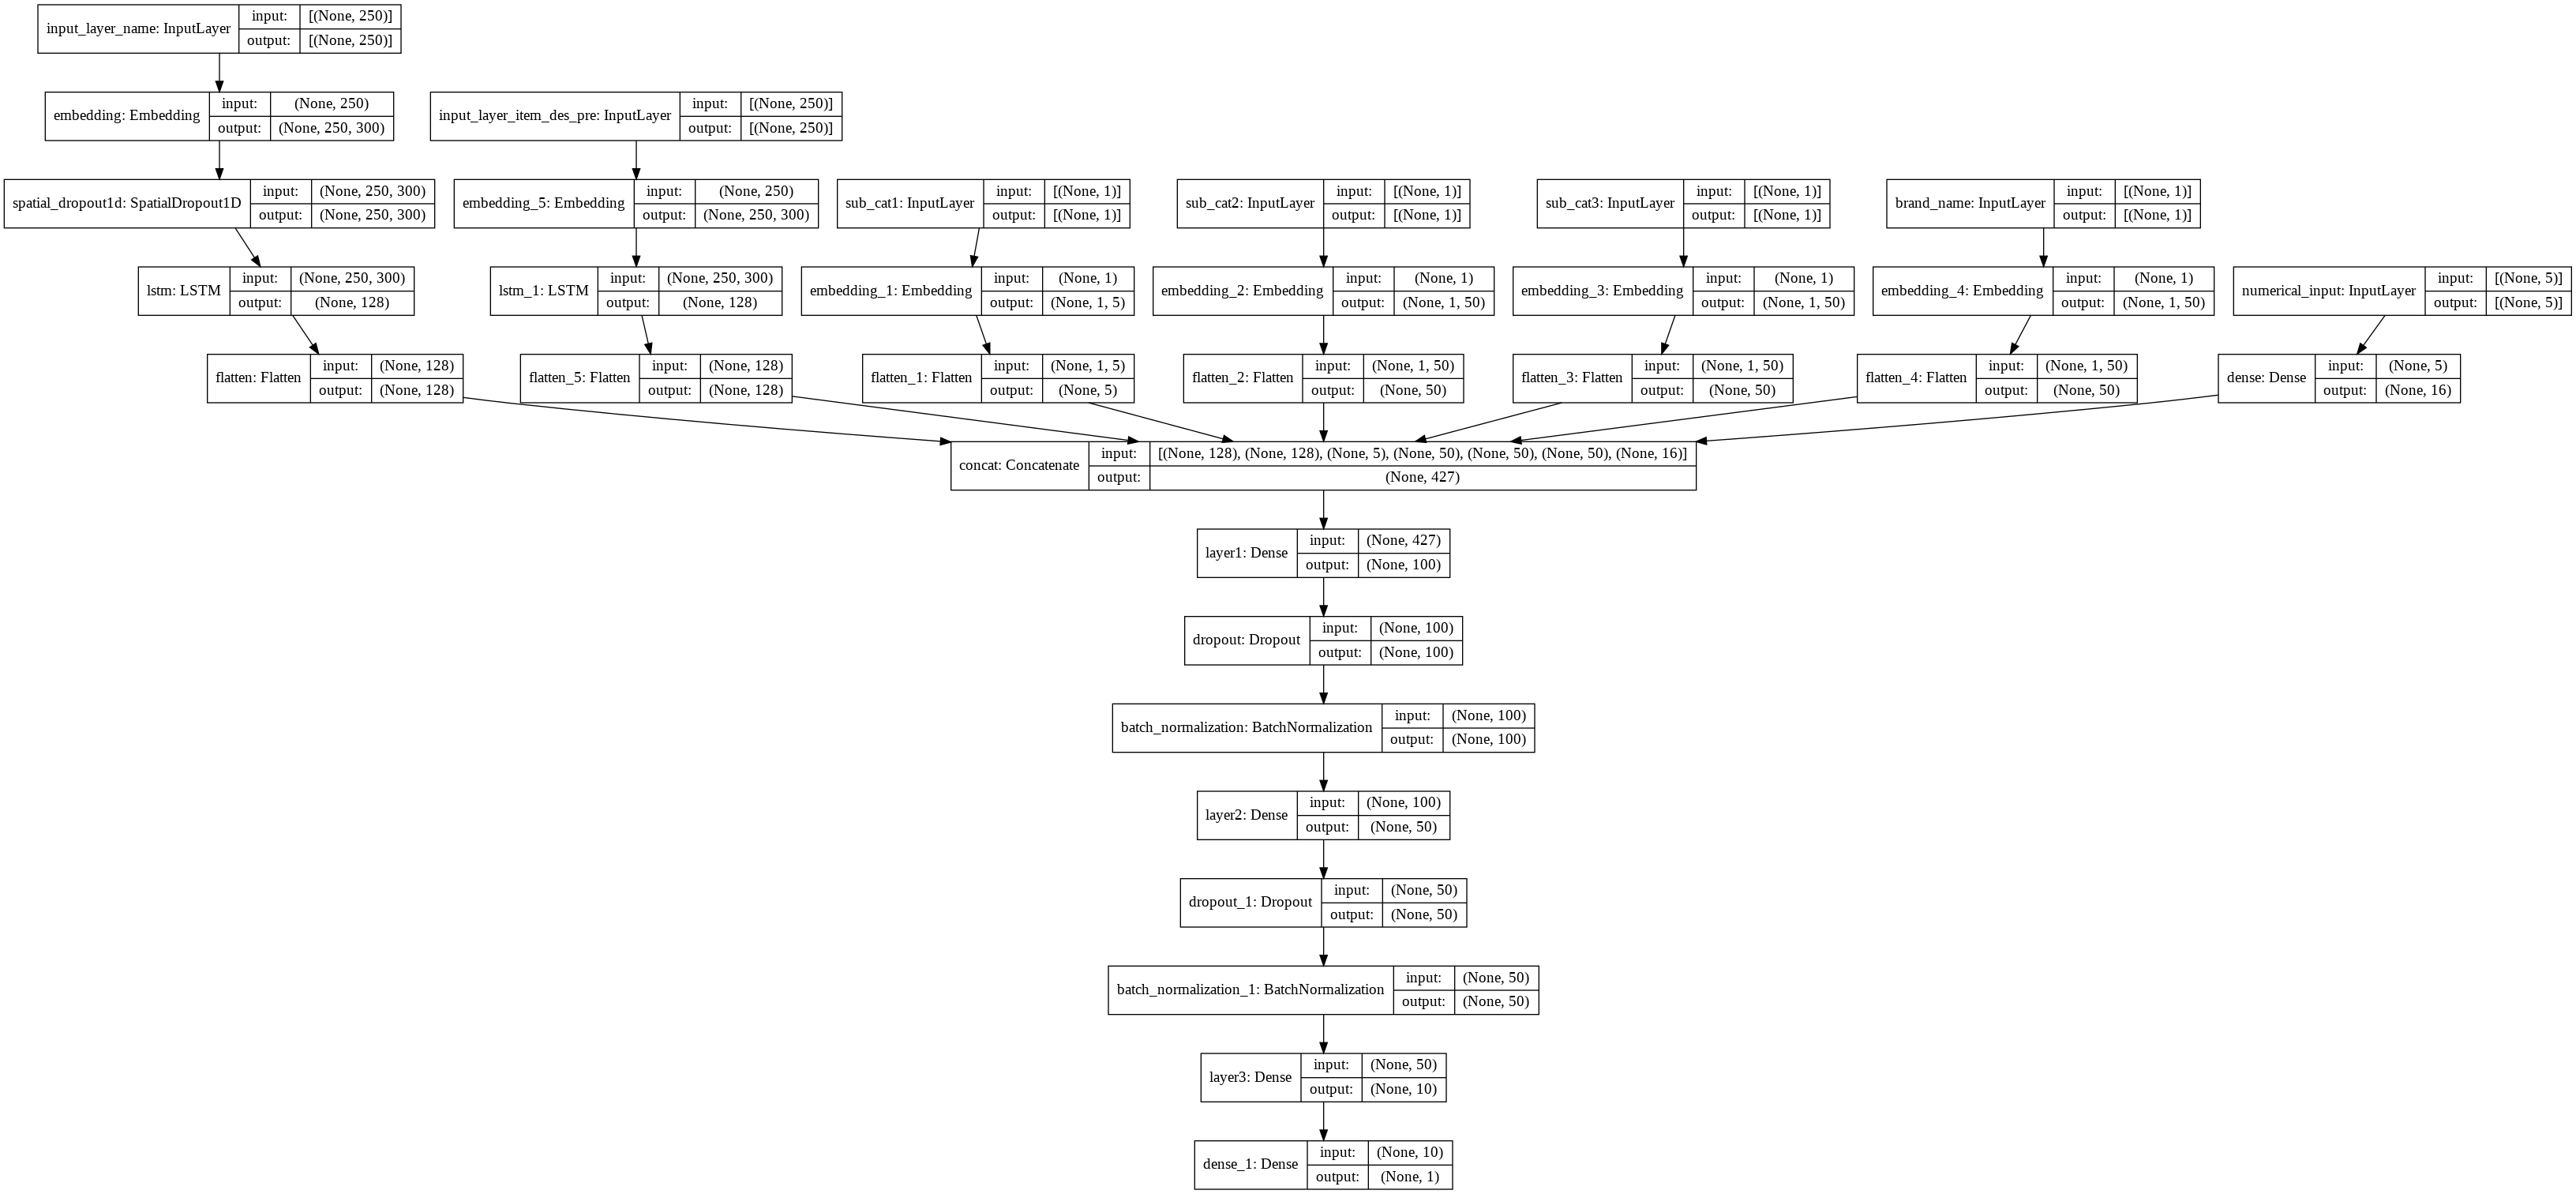

In [69]:
tf.keras.utils.plot_model(model=model, to_file='model_1_plot.png', show_shapes=True)

In [70]:
train_full=[padded_docs_X_train_pre_item_des,padded_docs_X_train_name,X_train_sub_cat1,X_train_sub_cat2,X_train_sub_cat3,X_train_brand_name,X_train_numerical_feat]
            
cv_full=[padded_docs_X_cv_pre_item_des,padded_docs_X_cv_name,X_cv_sub_cat1,X_cv_sub_cat2,X_cv_sub_cat3,X_cv_brand_name,X_cv_numerical_feat]

test_full=[padded_docs_X_test_pre_item_des,padded_docs_X_test_name,X_test_sub_cat1, X_test_sub_cat2,X_test_sub_cat3,X_test_brand_name,X_test_numerical_feat]


In [71]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=[tf.keras.metrics.RootMeanSquaredError()])


# log_dir = "logs11/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
checkpoint1 = ModelCheckpoint(filepath='pavan', monitor='val_loss',verbose=1, save_best_only=True, mode='min')
earlystop1 = EarlyStopping(monitor = 'val_loss',  
                            patience = 4,
                            verbose = 1)


callbacks_1 = [checkpoint1,earlystop1]


In [72]:
model.fit(train_full,y_train,batch_size=1024,
                        epochs=200,validation_data=(cv_full,y_cv),callbacks=callbacks_1)

Epoch 1/200
1375/1375 [==============================] - 334s 236ms/step - loss: 1.2775 - root_mean_squared_error: 0.9697 - val_loss: 0.3842 - val_root_mean_squared_error: 0.5588

Epoch 00001: val_loss improved from inf to 0.38423, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 2/200
1375/1375 [==============================] - 324s 236ms/step - loss: 0.3850 - root_mean_squared_error: 0.5728 - val_loss: 0.3341 - val_root_mean_squared_error: 0.5521

Epoch 00002: val_loss improved from 0.38423 to 0.33414, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 3/200
1375/1375 [==============================] - 324s 235ms/step - loss: 0.3418 - root_mean_squared_error: 0.5623 - val_loss: 0.3204 - val_root_mean_squared_error: 0.5491

Epoch 00003: val_loss improved from 0.33414 to 0.32043, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 4/200
1375/1375 [==============================] - 324s 236ms/step - loss: 0.3280 - root_mean_squared_error: 0.5570 - val_loss: 0.3142 - val_root_mean_squared_error: 0.5471

Epoch 00004: val_loss improved from 0.32043 to 0.31424, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 5/200
1375/1375 [==============================] - 324s 235ms/step - loss: 0.3227 - root_mean_squared_error: 0.5553 - val_loss: 0.3105 - val_root_mean_squared_error: 0.5454

Epoch 00005: val_loss improved from 0.31424 to 0.31047, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 6/200
1375/1375 [==============================] - 323s 235ms/step - loss: 0.3185 - root_mean_squared_error: 0.5531 - val_loss: 0.3090 - val_root_mean_squared_error: 0.5454

Epoch 00006: val_loss improved from 0.31047 to 0.30900, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 7/200
1375/1375 [==============================] - 324s 236ms/step - loss: 0.3165 - root_mean_squared_error: 0.5523 - val_loss: 0.3076 - val_root_mean_squared_error: 0.5448

Epoch 00007: val_loss improved from 0.30900 to 0.30757, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 8/200
1375/1375 [==============================] - 323s 235ms/step - loss: 0.3149 - root_mean_squared_error: 0.5516 - val_loss: 0.3059 - val_root_mean_squared_error: 0.5437

Epoch 00008: val_loss improved from 0.30757 to 0.30588, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 9/200
1375/1375 [==============================] - 324s 235ms/step - loss: 0.3135 - root_mean_squared_error: 0.5508 - val_loss: 0.3044 - val_root_mean_squared_error: 0.5428

Epoch 00009: val_loss improved from 0.30588 to 0.30443, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 10/200
1375/1375 [==============================] - 323s 235ms/step - loss: 0.3123 - root_mean_squared_error: 0.5501 - val_loss: 0.3061 - val_root_mean_squared_error: 0.5448

Epoch 00010: val_loss did not improve from 0.30443
Epoch 11/200
1375/1375 [==============================] - 323s 235ms/step - loss: 0.3108 - root_mean_squared_error: 0.5491 - val_loss: 0.3033 - val_root_mean_squared_error: 0.5424

Epoch 00011: val_loss improved from 0.30443 to 0.30331, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 12/200
1375/1375 [==============================] - 323s 235ms/step - loss: 0.3115 - root_mean_squared_error: 0.5500 - val_loss: 0.3048 - val_root_mean_squared_error: 0.5439

Epoch 00012: val_loss did not improve from 0.30331
Epoch 13/200
1375/1375 [==============================] - 323s 235ms/step - loss: 0.3099 - root_mean_squared_error: 0.5487 - val_loss: 0.3096 - val_root_mean_squared_error: 0.5486

Epoch 00013: val_loss did not improve from 0.30331
Epoch 14/200
1375/1375 [==============================] - 324s 235ms/step - loss: 0.3091 - root_mean_squared_error: 0.5480 - val_loss: 0.3048 - val_root_mean_squared_error: 0.5443

Epoch 00014: val_loss did not improve from 0.30331
Epoch 15/200
1375/1375 [==============================] - 323s 235ms/step - loss: 0.3083 - root_mean_squared_error: 0.5475 - val_loss: 0.3052 - val_root_mean_squared_error: 0.5447

Epoch 00015: val_loss did not improve from 0.30331
Epoch 00015: early stopping


In [73]:
model_best = tf.keras.models.load_model(filepath='pavan')

In [74]:
submission_prices = model_best.predict(cv_full)


In [75]:
rmsle(np.expm1(y_cv.tolist()), np.expm1(submission_prices))

0.5424180606272203